In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
from run_grid_search import load_json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
alias = {"ada_boost": "ensamble1"}

In [3]:
model = "ensamble2"
features = COLUMNS

In [4]:
def plot_regression(data_df: pd.DataFrame, model: str) -> None:
    model = alias[model] if model in alias.keys() else model

    y_real = data_df["rejeicao"].values
    pred = data_df["predicao"].values

    cor = data_df[["rejeicao", "predicao"]].corr()["rejeicao"]["predicao"]

    # There is a better way of doing this, but the deadline is tomorrow
    renamed_df = data_df.rename(columns={"rejeicao": "Rejection", "predicao": "Prediction"})

    plot = renamed_df.plot.scatter(x="Rejection", y="Prediction", c="red", s=100, title=model)
    x_min, x_max = data_df["rejeicao"].min(), data_df["rejeicao"].max()
    y_min, y_max = data_df["predicao"].min(), data_df["predicao"].max()
    range_ = [min(x_min, y_min), max(x_max, y_max)]
    plt.plot(range_, range_) 
    plot.text( max(x_max, y_max) -  max(x_max, y_max)/10, 0, f"C = {np.round(cor, 3)}", fontsize=25, bbox={"boxstyle": 'square', "facecolor": 'white', "alpha": 1, "pad":0.2})

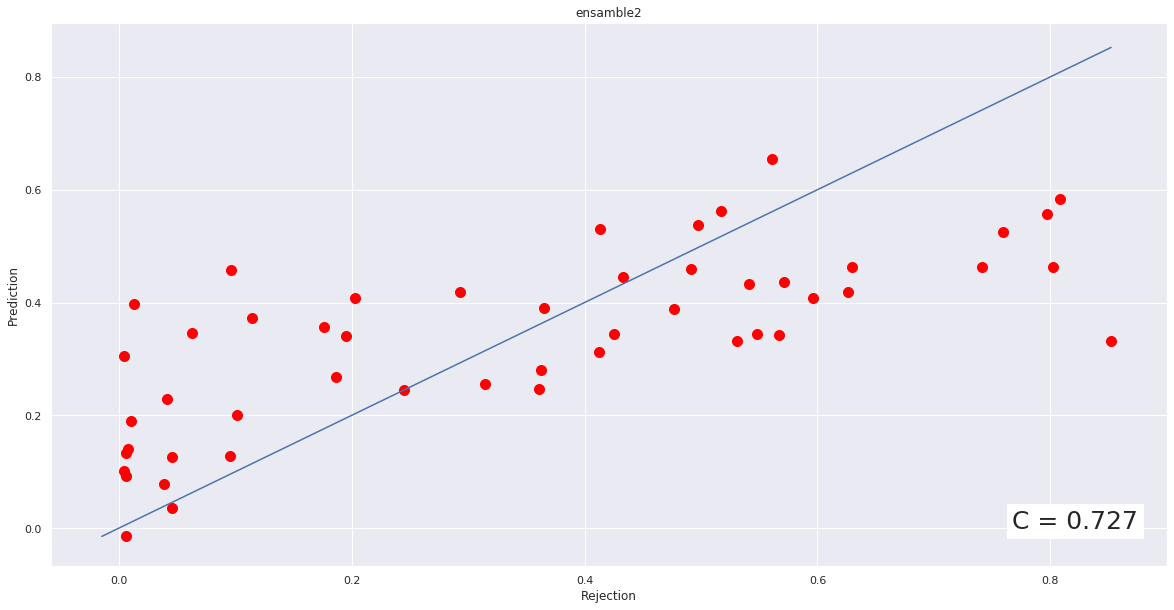

In [5]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]
data_df = get_data(features, normalize=normalize)
x, y = data_df.drop(columns=DEFAULT_COLUMNS, axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)
reg = regressor(**params)
preds = cross_val_predict(reg, x, y, cv=17, n_jobs=5)
data_df["predicao"] = preds
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])
plot_regression(data_df, model)
    

In [9]:
data_df[["paredao", "nome", "rejeicao", "predicao"]].sort_values(by="paredao")

,paredao,nome,rejeicao,predicao
40,1,lucas_chumbo,0.7594,0.525461
39,1,bianca_andrade,0.2446,0.245430
38,2,hadson,0.1863,0.267146
37,2,pyong,0.0066,-0.014576
36,2,petrix,0.8027,0.462787
35,2,babu,0.0044,0.305307
13,3,hadson,0.7971,0.557423
12,3,felipe_prior,0.2029,0.408769
48,4,victor_hugo,0.3608,0.247464
49,4,lucas,0.6262,0.418766


# Métricas

In [6]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.03481577208867509
mae: 0.1515358021206169
r2: 0.5051165803963662
